# Car Price Prediction

### Contributors: Preeti Dubey

In [84]:
#Importing the desired libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.simplefilter('ignore')
import statistics
import requests
from bs4 import BeautifulSoup
import csv
from collections import Counter
from scipy import stats

In [85]:
cars1=pd.read_csv(r'C:\Users\ajayd\OneDrive\Desktop\Github\Car Prices Prediction\Car-1.csv')
cars2=pd.read_csv(r'C:\Users\ajayd\OneDrive\Desktop\Github\Car Prices Prediction\Car-2.csv')

In [86]:
cars1.head(2)

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


In [87]:
cars2.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [88]:
cars1.shape,cars2.shape

((205, 17), (205, 12))

In [89]:
cars1['car_ID'].nunique(), cars2['car_ID'].nunique()

(205, 205)

In [90]:
cars1.isna().sum(), cars2.isna().sum()

(car_ID              0
 symboling           0
 CarName             0
 wheelbase           0
 carlength           0
 carwidth            0
 carheight           0
 curbweight          0
 enginesize          0
 boreratio           0
 stroke              0
 compressionratio    0
 horsepower          0
 peakrpm             0
 citympg             0
 highwaympg          0
 price               0
 dtype: int64,
 car_ID            0
 symboling         0
 CarName           0
 fueltype          0
 aspiration        0
 doornumber        0
 carbody           0
 drivewheel        0
 enginelocation    0
 enginetype        0
 cylindernumber    0
 fuelsystem        0
 dtype: int64)

# Merging the two datasets

In [91]:
df=pd.merge(cars1, cars2, on='car_ID',how='inner')

In [92]:
df.columns

Index(['car_ID', 'symboling_x', 'CarName_x', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'symboling_y', 'CarName_y', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling_x       205 non-null    int64  
 2   CarName_x         205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
 1

* Final dataset 'cars' consists of 205 rows and 28 columns
* The dataset is clean and contains no null values
* The dataset consists of classification and quantative variables


# 2. Exploratory Data Analysis

In [113]:
# Getting the name of the company
df['Company_name']=df['CarName_x'].str.split(' ',expand=True)[0]

In [116]:
df.describe()

,car_ID,symboling_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_y
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.834146
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,1.245307
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,2.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


In [117]:
# The columns symboling_x and symboling_y are exactly similiar. Let's drop one of them
df.drop(columns=['symboling_x'],inplace=True)

In [119]:
pd.DataFrame(df.nunique())

,0
car_ID,205
CarName_x,147
wheelbase,53
carlength,75
carwidth,44
carheight,49
curbweight,171
enginesize,44
boreratio,38
stroke,37


There is no column that has only one unique value. Hence we will not drop any of the above columns

## Outlier Analysis : Z score Approach and using Boxplots to visualise 

In [127]:
col=['car_ID','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
     'compressionratio','horsepower','peakrpm','citympg','highwaympg','price','symboling_y']
df1=df[col].copy()

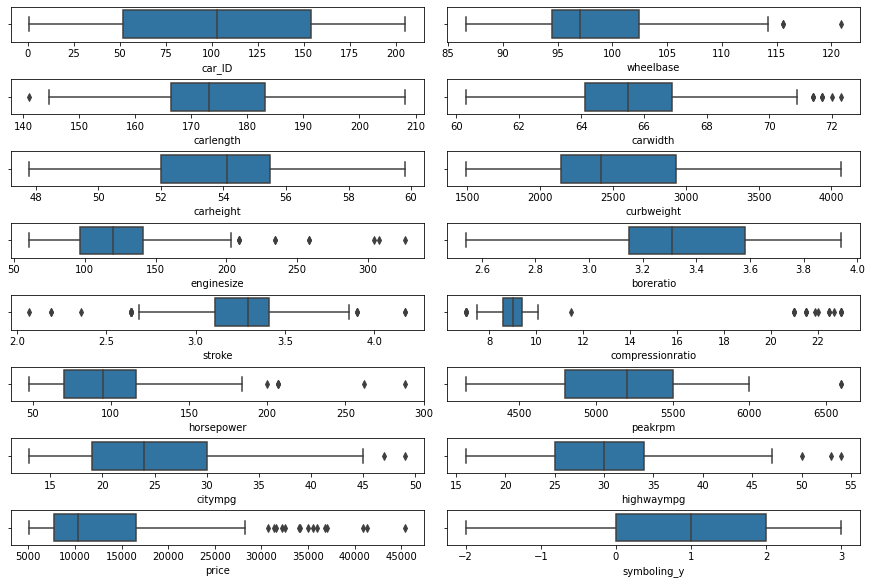

In [139]:
#Boxplots
fig2,ax1=plt.subplots(nrows=8,ncols=2,figsize=(12,8),constrained_layout=True)
ax1=ax1.flatten()
start=0
for i,j in df1.items():
    sns.boxplot(j,ax=ax1[start])
    
    start+=1
fig1.tight_layout(pad =  4.0)

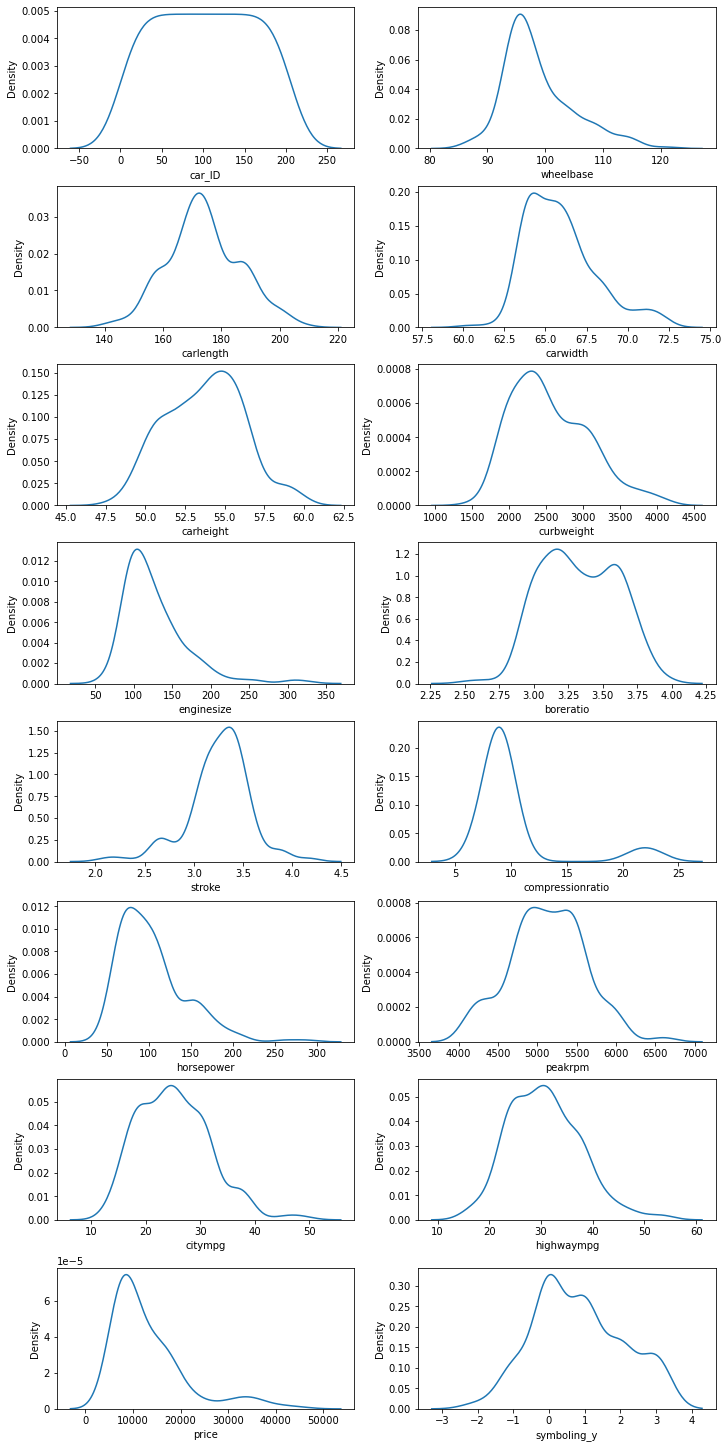

In [140]:
# Histograms
fig2,ax1=plt.subplots(nrows=8,ncols=2,figsize=(10,20),constrained_layout=True)
ax1=ax1.flatten()
start=0
for i,j in df1.items():
    sns.kdeplot(j,ax=ax1[start])
    
    start+=1
fig1.tight_layout(pad =  4.0)

### Inference from the above boxplots and kdeplots
1. Most columns are approximately normally distributed except for columns
 * Price
 * Stroke
 * compressionratio
 * enginesize
2. There are a lot of outlier values in the following columns: 
 * enginesize
 * stroke
 * price
 * highwaympg
 * compressionratio
 * carwidth

### Checking columns containing outliers in the above boxplots
### Considering Outlier values only if the Z-Score Values are greater than 3

In [147]:
z1 = np.abs(stats.zscore(df['price']))
z2 = np.abs(stats.zscore(df['stroke']))
z3 = np.abs(stats.zscore(df['compressionratio']))
z4 = np.abs(stats.zscore(df['enginesize']))
z5 = np.abs(stats.zscore(df['carwidth']))

In [149]:
print(np.where(z1 > 3))  # price has 3 outlier valiues(Values that are more than 3 sigma away from the mean)

(array([16, 73, 74], dtype=int64),)


In [166]:
df.loc[[16,73,74]]['price'] # Prices can  be high for some cars . Hence it seems ok to be included

16    41315.0
73    40960.0
74    45400.0
Name: price, dtype: float64

In [167]:
print(np.where(z2>3)) # stroke has 3 outlier values 

(array([111, 113, 134], dtype=int64),)


In [168]:
df.loc[[111,113,134]] # stroke can be high or low as per engine design. Hence can be used in the model 

,car_ID,CarName_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company_name
111,112,peugeot 504,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,...,gas,std,four,sedan,rwd,front,l,four,mpfi,peugeot
113,114,peugeot 504,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,...,gas,std,four,wagon,rwd,front,l,four,mpfi,peugeot
134,135,saab 99le,99.1,186.6,66.5,56.1,2707,121,2.54,2.07,...,gas,std,two,hatchback,fwd,front,ohc,four,mpfi,saab


In [169]:
print(np.where(z3>3)) # Compression ratio has 9 outlier values

(array([ 63, 158, 159, 174, 182, 184, 187, 192, 203], dtype=int64),)


In [177]:
df.loc[[63, 158, 159, 174, 182, 184, 187, 192, 203]]['compressionratio'].describe()

count     9.000000
mean     22.800000
std       0.244949
min      22.500000
25%      22.500000
50%      23.000000
75%      23.000000
max      23.000000
Name: compressionratio, dtype: float64

In [178]:
df['compressionratio'].describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

In [161]:
print(np.where(z4>3)) # enginesize has 5 outlier values

(array([47, 48, 49, 73, 74], dtype=int64),)


In [180]:
df.loc[[47,48,49,73,74]]['enginesize'].describe()

count      5.000000
mean     290.800000
std       31.067668
min      258.000000
25%      258.000000
50%      304.000000
75%      308.000000
max      326.000000
Name: enginesize, dtype: float64

In [164]:
print(np.where(z5>3)) #carwidhth has no value that is more than 3 sigma away from the mean

(array([], dtype=int64),)


### There are outlier values based on the Z-Score approch and these values seem reasonable. Hence we need not remove these outlier values from the model 

# Let's do more Exploration

# Mean Prices by Company

In [51]:
px.bar(df.groupby('Company_name').mean('price')['price'].sort_values(ascending=False))

In [58]:
col_list=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

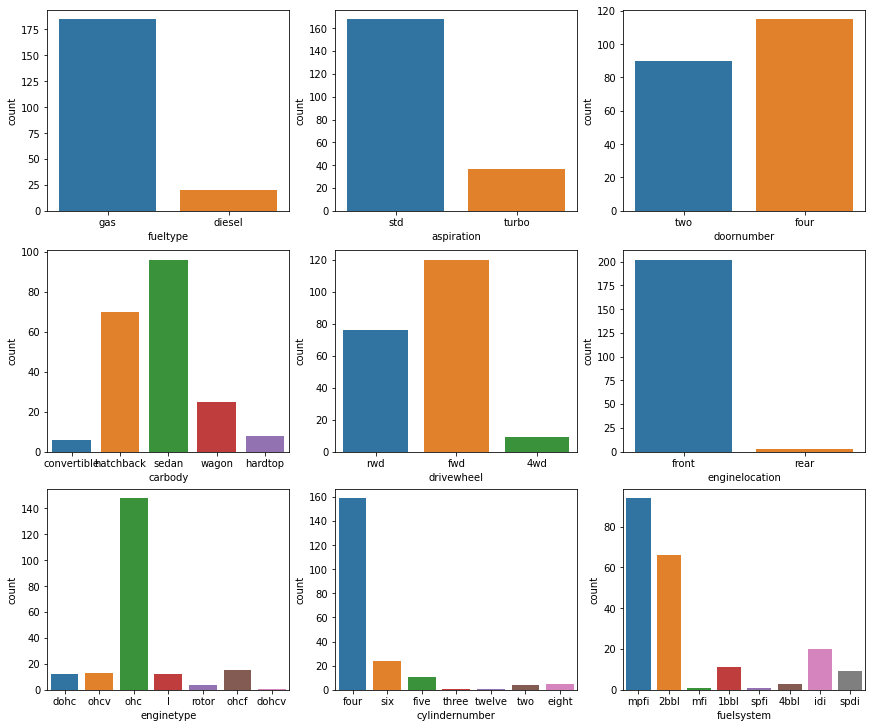

In [66]:
fig1, ax=plt.subplots(nrows=3, ncols=3, figsize=(12,10),constrained_layout=True)
ax=ax.flatten()
for i,j in enumerate(col_list):
    sns.countplot(df[j],ax=ax[i])

# From the Visuals above, we conclude the following :
1. Majority Cars sold are based on Gas
2. Turbo is rarely used in most of the cars sold. 
3. 4 door cars are more sold than 2 door cars
4. Sedan is the most sold segment in the car industry. 
5. Forward Wheel drive vehicles are preferred more than the rear wheel drive and 4 wheel drive systems
6. Front mounted engine configuration is more sought in the cars sold as per the dataset
7. engine Types with Over head cam Shafts are the most sold in the market. 
8. 4 Cylinder cars are most sold because of fuel mileage reasons we suppose. **We will dig a more deeper into this aspect with the next visualisation** <br>
9. **Multi point Fuel injection systems are most sold. We will explore the reasons for this in the next visualisations.**

In [76]:
px.bar(df.groupby('cylindernumber').mean('citympg')['citympg'].sort_values(ascending=False))

In [83]:
px.bar(df.groupby('cylindernumber').mean('highwaympg')['highwaympg'].sort_values(ascending=False))

###  From the above two plots, it is evident that cars with three cylinders have the most efficiency. Since this does not gives the answer to why cars with 4 cylinders are most sold, lets look at the prices into consideration. 

In [81]:
px.bar(df.groupby('cylindernumber').mean('price')['price'].sort_values(ascending=False))

### Even the prices of three cylinder engine cars are on average less than 4 cylinder engines 
### There must be some other reason not captured in the data

In [94]:
df.columns

Index(['car_ID', 'symboling_x', 'CarName_x', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'symboling_y', 'CarName_y', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

<AxesSubplot:>

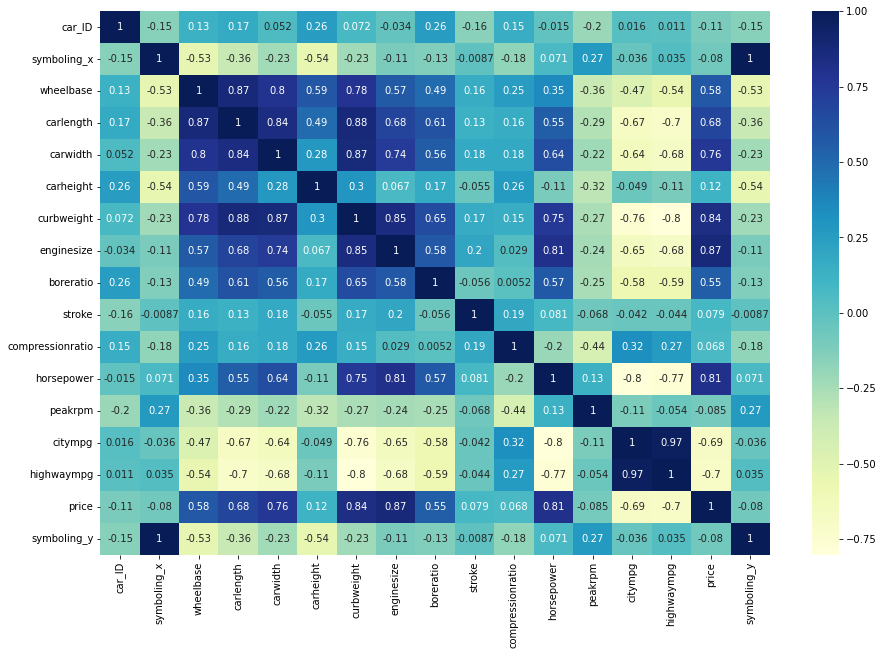

In [108]:
#Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True) 

### The heatmap shows some useful insights:

#### Correlation of price with independent variables:

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)
<br>
* Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggests that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think cars that are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)
<br>

### Correlation among independent variables:

Many independent variables are highly correlated (look at the top-left part of matrix): <br>
 * wheelbase
 * carlength
 * curbweight
 * engine size are all measures of 'size/weight', and are positively correlated
### Thus, while building the model, we'll have to pay attention to multicollinearity.

# Data Preparation using LabelEncoding and OnehotEncoding

In [230]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['fueltype']=labelencoder.fit_transform(df['fueltype'])
df['aspiration']=labelencoder.fit_transform(df['aspiration'])
df['doornumber']=labelencoder.fit_transform(df['doornumber'])
df['carbody']=labelencoder.fit_transform(df['carbody'])
df['drivewheel']=labelencoder.fit_transform(df['drivewheel'])
df['enginelocation']=labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem']=labelencoder.fit_transform(df['fuelsystem'])
df['cylindernumber']=labelencoder.fit_transform(df['cylindernumber'])

# Model Building and Evaluation

In [232]:
from sklearn.model_selection import train_test_split
y=df['price']
x=df[[ 'wheelbase', 'carlength', 'carwidth', 'carheight',
              'curbweight', 'enginesize', 'boreratio', 'stroke',
               'compressionratio', 'horsepower', 'peakrpm' , 'citympg', 'highwaympg', 'doornumber', 
           'cylindernumber','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem']]

In [233]:
x_train,x_test,y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=220)

# Model 1 building using Linear Regression (All variables)

In [235]:
x_train.shape, y_train.shape

((164, 22), (164,))

In [236]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True)
model1 = lm.fit(x_train, y_train)
model1.score(x_train, y_train)

0.8732130107664307

In [237]:
model1.coef_

array([ 1.45551312e+01,  4.98961942e+00,  9.10293819e+02,  1.31902953e+02,
        1.89539567e+00,  1.15085577e+02, -2.63347521e+03, -3.20773743e+03,
       -4.76347701e+02,  1.87227724e+01,  2.17107396e+00,  2.75172562e+01,
        4.27992937e+00, -5.01498766e+01,  8.39792606e+02, -7.94293810e+03,
        2.44417223e+02, -5.01498766e+01, -5.47534241e+02,  6.85511149e+02,
        8.71062785e+03, -1.91597346e+02])

In [238]:
model1.intercept_

-59028.106034036

# Using Ordinary Least Squares

In [239]:
import statsmodels.api as sm  

# Fitting the model with 16 variables
lm1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()   
print(lm1.summary())
                            

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     46.57
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.91e-53
Time:                        22:26:47   Log-Likelihood:                -1525.7
No. Observations:                 164   AIC:                             3095.
Df Residuals:                     142   BIC:                             3164.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.903e+04   2.08e+04  

# AIC and BIC scores are very high. Let's use OnehotEncoding and try to fit the model. The algorithm may have misrepresented the labelencoded values

In [315]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [316]:
df=pd.merge(cars1, cars2, on='car_ID',how='inner')


In [317]:
df.drop(columns=['CarName_x','CarName_y','symboling_x','symboling_y','car_ID'],axis=1,inplace=True)

In [319]:
df_enc=pd.DataFrame(encoder.fit_transform(df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
                         'cylindernumber','fuelsystem']]).toarray())

In [320]:
df.drop(columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
                         'cylindernumber','fuelsystem'],axis=1,inplace=True)

In [321]:
df_f=df.join(df_enc)
y=df_f['price']

In [322]:
df_f1=df_f.drop(columns=['price'])

In [323]:
x=df_f1

In [324]:
x_train1,x_test1, y_train1,y_test1=train_test_split(x,y,test_size=0.2, random_state=220)

In [325]:
lm1 = LinearRegression(fit_intercept = True)
model1 = lm.fit(x_train1, y_train1)
model1.score(x_train1, y_train1)

0.9327082349863911

In [329]:
model1.intercept_

-31975.032858387414

In [331]:
model1.coef_

array([ 1.83635073e+01, -6.98822126e+00,  5.99116059e+02,  1.82986809e+01,
        3.87929630e+00,  1.13309230e+02, -2.01911334e+03, -3.99927884e+03,
       -7.26783406e+02,  1.17063911e+01,  2.30019988e+00, -7.50832518e+00,
        8.31284862e+01,  3.65517592e+03, -3.65517592e+03, -6.74581195e+02,
        6.74581195e+02, -3.07588011e+02,  3.07588011e+02,  3.32685566e+03,
       -2.09798480e+03, -7.61994952e+02,  3.71291286e+02, -8.38167192e+02,
       -1.75310448e+01, -4.11004869e+02,  4.28535914e+02, -4.44062242e+03,
        4.44062242e+03, -4.86433263e+02, -3.68273533e+03,  4.14041970e+02,
        3.76140126e+03,  1.93887408e+03, -4.77580336e+03,  2.83065465e+03,
        3.28596993e+03, -4.25676409e+03, -4.72628055e+03, -9.02396446e+02,
        3.76881650e+03,  0.00000000e+00,  2.83065465e+03,  9.63778075e+02,
        7.09258001e+02, -9.49229555e+02,  3.65517592e+03, -2.67846187e+03,
        5.53102460e+02, -2.13287816e+03, -1.20744865e+02])

# using the OLS Method

In [332]:
# Fitting the model with 16 variables
lm11 = sm.OLS(y_train1, sm.add_constant(x_train1)).fit()   
print(lm11.summary())
                     

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     44.07
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.47e-56
Time:                        23:54:06   Log-Likelihood:                -1473.8
No. Observations:                 164   AIC:                             3028.
Df Residuals:                     124   BIC:                             3152.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7855.3755   4163.704  

### The AIC and the BIC Scores have reduced and R squared values have increased. But there are a lot of features. Let' s try reducing the number of features 

# Recursive Feature Elimination to select the best features for the model 

In [430]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=40)
rfe.fit(x_train1, y_train1)

# Subset the features selected by rfe1
col1 = x_train1.columns[rfe.support_]

# Subsetting training data for 8 selected columns
x_train_rfe1 = x_train1[col1]

# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

# Fitting the model with 40 variables
lm2 = sm.OLS(y_train1, x_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     46.16
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.77e-57
Time:                        01:20:05   Log-Likelihood:                -1478.2
No. Observations:                 164   AIC:                             3030.
Df Residuals:                     127   BIC:                             3145.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9651.3077   8409.992  

In [433]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=30)
rfe.fit(x_train1, y_train1)

# Subset the features selected by rfe1
col1 = x_train1.columns[rfe.support_]

# Subsetting training data for 8 selected columns
x_train_rfe1 = x_train1[col1]

# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

# Fitting the model with 40 variables
lm2 = sm.OLS(y_train1, x_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     43.82
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.18e-54
Time:                        01:21:09   Log-Likelihood:                -1508.8
No. Observations:                 164   AIC:                             3074.
Df Residuals:                     136   BIC:                             3160.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.622e+04   7313.947  

In [436]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=20)
rfe.fit(x_train1, y_train1)

# Subset the features selected by rfe1
col1 = x_train1.columns[rfe.support_]

# Subsetting training data for 8 selected columns
x_train_rfe1 = x_train1[col1]

# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

# Fitting the model with 40 variables
lm2 = sm.OLS(y_train1, x_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     46.33
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.26e-52
Time:                        01:21:49   Log-Likelihood:                -1530.1
No. Observations:                 164   AIC:                             3102.
Df Residuals:                     143   BIC:                             3167.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.74e+04    1.7e+04  

In [456]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
rfe.fit(x_train1, y_train1)

# Subset the features selected by rfe1
col1 = x_train1.columns[rfe.support_]

# Subsetting training data for 8 selected columns
x_train_rfe1 = x_train1[col1]

# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

# Fitting the model with 40 variables
lm2 = sm.OLS(y_train1, x_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     76.44
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.45e-54
Time:                        01:35:52   Log-Likelihood:                -1548.2
No. Observations:                 164   AIC:                             3118.
Df Residuals:                     153   BIC:                             3152.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -2.86e+04   1.58e+04  

In [446]:
summary=pd.DataFrame({'No. of Variables':[50,40,30,20,10],'Adjusted_R2_Score':[0.912,0.909,0.876,0.866,0.849],
                      'AIC':[3028,3030,3074,3102,3102],'BIC':[3152,3145,3160,3167,3136]})

In [447]:
summary

,No. of Variables,Adjusted_R2_Score,AIC,BIC
0,50,0.912,3028,3152
1,40,0.909,3030,3145
2,30,0.876,3074,3160
3,20,0.866,3102,3167
4,10,0.849,3102,3136


### Since there are a lot of variables in the model, we will not take 50,40 variable model into consideration even with a very high adjusted_R2_score.  From the remaining models, we chose the model with 10 variables because of the least BIC Scores

# Residual Diagnostics

Before we make predictions on the test set, let's first analyse the residuals.

In [451]:
y_train_price = lm2.predict(x_train_rfe1)

Text(0.5, 0, 'Errors')

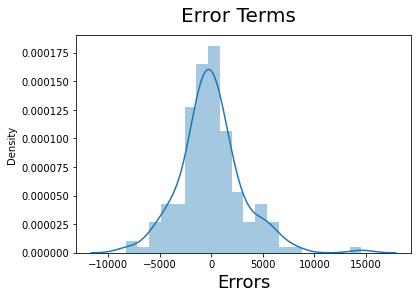

In [452]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

# Making Predictions

In [460]:
x_test_rfe1 = x_test1[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'stroke', 'compressionratio', 'horsepower', 'highwaympg']]

# Add a constant to the test set created
x_test_rfe1 = sm.add_constant(x_test_rfe1)
x_test_rfe1.head()

,const,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,highwaympg
204,1.0,109.1,188.8,68.9,55.5,3062,141,3.15,9.5,114,25
183,1.0,97.3,171.7,65.5,55.7,2209,109,3.40,9.0,85,34
65,1.0,104.9,175.0,66.1,54.4,2670,140,3.16,8.0,120,27
68,1.0,110.0,190.9,70.3,58.7,3750,183,3.64,21.5,123,25
49,1.0,102.0,191.7,70.6,47.8,3950,326,2.76,11.5,262,17


In [461]:
# Making predictions
y_pred = lm2.predict(x_test_rfe1)

Text(0, 0.5, 'y_pred')

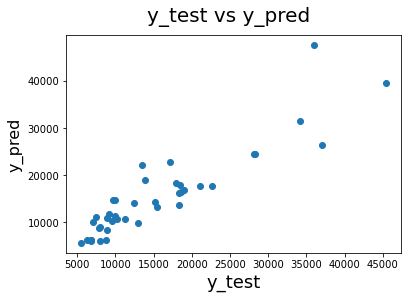

In [462]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [463]:
# r2_score for 10 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8263971853891673

# Thus, for now, the final model consists of the 10 variable model mentioned above